<a href="https://colab.research.google.com/github/BuKarData/dogbreedpredictions/blob/main/DogBreedprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"kapon00","key":"2e99ada960019955005a79265fe766db"}'}

# New Section

In [3]:
#kaggle api
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#this lets avoid a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!mkdir dog_dataset
%cd dog_dataset

mkdir: cannot create directory ‘dog_dataset’: File exists
/content/dog_dataset


In [6]:
#searching for dataset
!kaggle datasets list -s dogbreedidfromcomp


ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           7620         10  0.1764706        


In [7]:
#downloading dataset
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
100% 690M/691M [00:16<00:00, 47.0MB/s]
100% 691M/691M [00:16<00:00, 42.7MB/s]
/content


In [8]:
#managing files
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [9]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm #for better process visualization
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam


In [10]:
labels_all = pd.read_csv('dog_dataset/labels.csv') #reading the data
labels_all.shape
labels_all.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
breeds_all = labels_all['breed']
breeds_count = breeds_all.value_counts()
breeds_count.head()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [12]:
#limitation of breeds for better performance (computation power limits)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[labels_all['breed'].isin(CLASS_NAMES)]
labels = labels.reset_index()
labels.head()


,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [13]:
#matrix of zeros
X_data = np.zeros((len(labels), 224,224,3), dtype = 'float32')
#one hot encoding
y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

#Reading and converting image to an array and normalizing it
for i in tqdm(range(len(labels))):
  img = image.load_img('dog_dataset/train/%s.jpg'% labels['id'][i], target_size = (224,224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy(), axis = 0)
  X_data[i] = x / 255.0

  print ('\nTrain Images shape: ', X_data.shape, ' size: {:,}'.format(X_data.size))
  print ('\nEncoded output shape: ', y_data.shape, ' size: {:,}'.format(y_data.size))

 23%|██▎       | 82/357 [00:00<00:00, 417.24it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,

 48%|████▊     | 173/357 [00:00<00:00, 440.05it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,

 74%|███████▍  | 264/357 [00:00<00:00, 443.22it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,

100%|██████████| 357/357 [00:00<00:00, 429.09it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,496

Encoded output shape:  (357, 3)  size: 1,071

Train Images shape:  (357, 224, 224, 3)  size: 53,738,

In [14]:
#building and training model
model = Sequential()

#adding model layers
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation = 'relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation = 'relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten()) #converting 2D map into 1D vector
model.add(Dense(128, activation = 'relu', kernel_regularizer = 'l2')) #feeding vector to the model
model.add(Dense(64, activation = 'relu', kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 16)          │          25,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 8)           │           3,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#splitting data
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_data, y_data, test_size = 0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.2)


In [16]:
#training the model
epochs = 30
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, y_val))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 59s 33s/step - accuracy: 0.3594 - loss: 4.8998 - val_accuracy: 0.2923 - val_loss: 4.8791
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 20s/step - accuracy: 0.3516 - loss: 4.8716 - val_accuracy: 0.3077 - val_loss: 4.8530
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 19s/step - accuracy: 0.3672 - loss: 4.8458 - val_accuracy: 0.3385 - val_loss: 4.8278
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 20s/step - accuracy: 0.3854 - loss: 4.8187 - val_accuracy: 0.3692 - val_loss: 4.8035
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 28s/step - accuracy: 0.3568 - loss: 4.7964 - val_accuracy: 0.3538 - val_loss: 4.7788
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 74s 20s/step - accuracy: 0.3958 - loss: 4.7694 - val_accuracy: 0.3692 - val_loss: 4.7543
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 20s/step - accuracy: 0.4271 - loss: 4.7452 - val_accuracy: 0.3692 - val_loss: 4.7301
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 38s 19s/step - accuracy: 0.4401 - loss: 4.7210 - val_accuracy: 0.3692 - val_loss: 4.7062


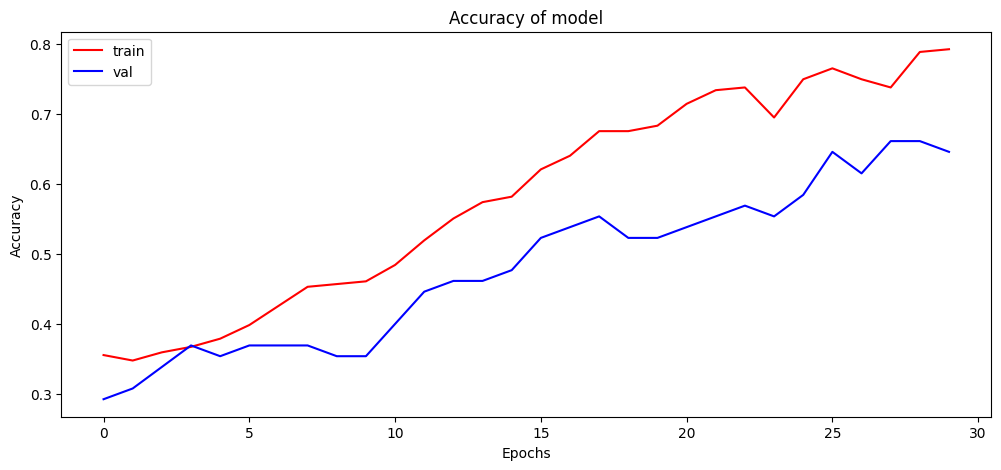

In [17]:
plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Accuracy of model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
#
plt.show()

In [18]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.7894 - loss: 3.9160
Accuracy over the test set: 
  77.78 %


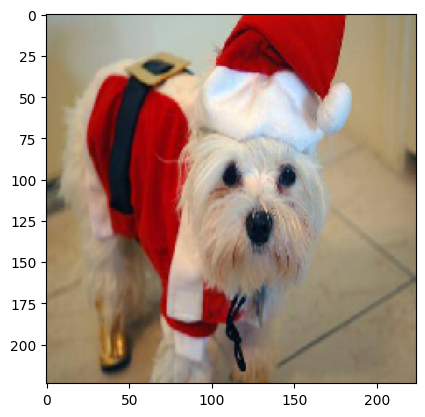

Predicted: maltese_dog
Actual: maltese_dog


In [28]:
plt.imshow(X_test[1,:,:,:])
plt.show()
print('Predicted:', labels['breed'][np.argmax(y_test[1])])
print('Actual:', labels['breed'][np.argmax(Y_pred[1])])